<div style="text-align: center;">
        <img src="images/molssi_logo_header.png" alt="MolSSI log" style="height: 250px;">
</div>

# Manipulating Molecules with RDKit

<div class="alert alert-block alert-info"> 

<h2>Overview</h2>

<strong>Questions</strong>

* How can I load files using RDKit?
* How can I manipulate and create new molecules from an existing molecule?

<strong>Objectives</strong>

* To understand the utility of the different Python libraries utilized in this notebook
* To explain the features of SMILES strings and how they are used to communicate chemical structures to computers
* To modify a ligand file in a meaningful way (*e.g.*, testing stereochemistry or electrochemistry) and to save the modified file for future use

</div>

In this notebook, we load an "ideal" structure for a ligand obtained in the [EC_class_ligands_search](EC_class_ligands_search.ipynb) notebook by pulling coordinates from the PDB and then we manipulate it using RDKit. 

The approach taken here is manual and hands on. We will pick atoms of interest visually, then morph atomic numbers in order to change a carbon atom into a nitrogen atom, and then add a methyl group by changing a hydrogen atom into a carbon atom.

By loading our molecule from an ideal structure with 3D coordinates, we can ensure that we're already near a "good structure" for our manipulated molecules and our geometry optimization will be more likely to succeed.

### Libraries for the IQB Workshop

| Library    | Description     |
| :-----------: | :------------ |
| rdkit | Cheminformatics Toolkit |
| Chem | A subset of rdkit for molecule manipulation |
| IPythonConsole | A subset of rdkit to control image quality |
| Draw | A subset of rdkit for structure drawing |
| AllChem | A subset of rdkit for optimizing 3D structures |

After completing this notebook, if you wish to dig deeper on rdkit, consider reading [Getting Started with rdkit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html).

[14:32:38] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


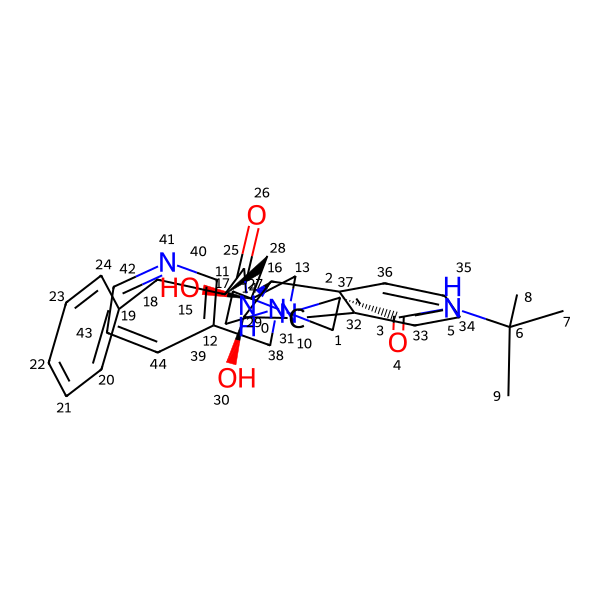

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

# Configuration for displaying in Jupyter notebooks
IPythonConsole.ipython_useSVG = True  # Use SVG for higher quality images
IPythonConsole.drawOptions.addAtomIndices = True  # Show atom indices
IPythonConsole.molSize = 600,600 # Set size of image

ligand = Chem.MolFromMolFile("ligands/resRIT.sdf")
ligand

### Modifying a ligand

We will modify [13U: N-cyclooctylglycyl-N-(4-carbamimidoylbenzyl)-L-prolinamide](https://www.rcsb.org/ligand/13U) from the previous notebook as our starting point to create two additional ligands. In one case, we will substitute nitrogen for carbon in an aromatic ring. In the second case, a carbon will be added to the original aromatic ring. 

Please notice the index numbers attached to each atom in the ligand image generated by the previous cell. This is possible because of an earlier command that we used to display these index numbers. 

`IPythonConsole.drawOptions.addAtomIndices = True  # Show atom indices`

We will use these index numbers to tell the Python code which atoms to modify.

We can see that the nitrogen we've added has a hydrogen attached to it.
In order to maintain aromaticity, we need to remove this hydrogen.

Now we'll perform the same operations, but this time add a methyl group to the ring.
In this notebook, we're going to be tricky and morph the hydrogen on the carbon atom to a carbon atom.
However, a more "standard" way to do this would be to create two molecule fragments and then merge them together.
To be consistent with our above approach, we'll do it the tricky way.

[14:32:49] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


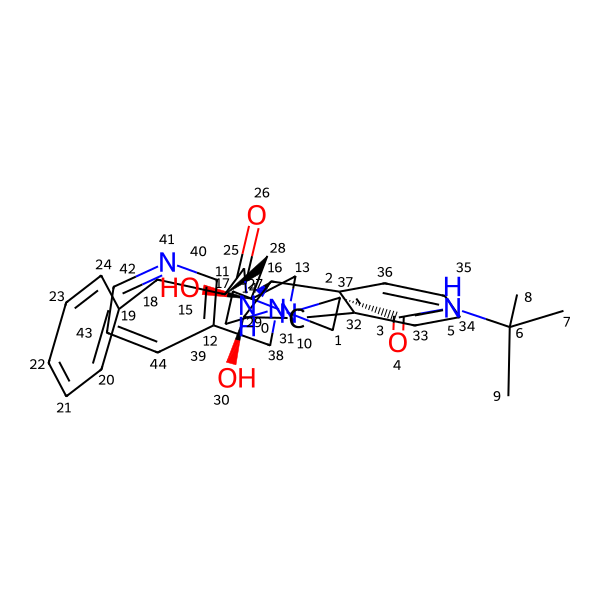

In [2]:
# load another duplicate of the original ligand, but keep the hydrogens

mod_ligand_methyl = Chem.MolFromMolFile("ligands/MK1_ideal.sdf", )
mod_ligand_methyl        # This is the original structure. In the cells below, we will convert Hydrogen-59 to a Carbon.

Now that we have our manipulated molecules, we'll optimize them using RDKit and save them.

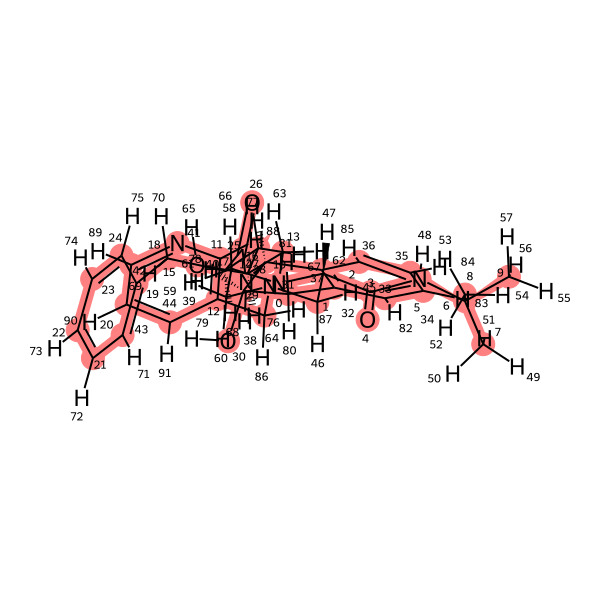

In [3]:
# Optimize new molecules and save
from rdkit import Chem 
from rdkit.Chem import AllChem

Chem.SanitizeMol(mod_ligand_methyl)
mod_ligand_H = Chem.AddHs(mod_ligand_methyl)

# Do a constrained embedding to keep the ligand in the same position
# this allows for the hydrogens to be added in reasonable locations, but keeps
# the heavy atoms in the same position
# See https://rdkit.org/docs/source/rdkit.Chem.AllChem.html#rdkit.Chem.AllChem.ConstrainedEmbed
constrained_mol = AllChem.ConstrainedEmbed(mod_ligand_H, mod_ligand_methyl, useTethers=True)
constrained_mol

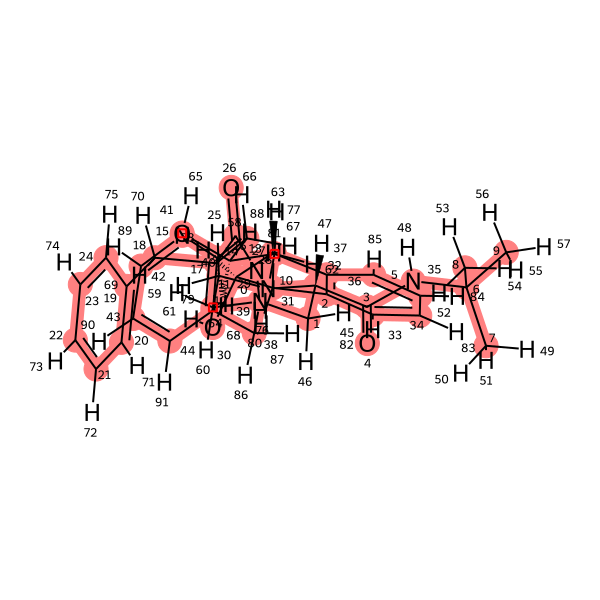

In [4]:
# Perform geometry optimization
opt_H = AllChem.MMFFOptimizeMolecule(mod_ligand_H)
mod_ligand_H

In [5]:
import os
from rdkit import Chem

# Make modified ligand directory
os.makedirs("ligands_to_dock", exist_ok=True)

# Load the ligand from the SDF file
ligand = Chem.MolFromMolFile("ligands/resRIT.sdf", removeHs=False)

# Add hydrogens if needed
ligand_H = Chem.AddHs(ligand)

# Save modified ligands (ensure all contain hydrogens and place in a folder of ligands to dock)
Chem.MolToMolFile(ligand_H, 'ligands_to_dock/resRIT.sdf')

# For modified ligand, repeat the same steps (assuming mod_ligand is defined elsewhere)
mod_ligand_H = Chem.AddHs(mod_ligand_H)  # You should define `mod_ligand` earlier if it's not defined yet
Chem.MolToMolFile(mod_ligand_H, 'ligands_to_dock/resRIT_modified.sdf')


[14:33:01] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
